## Time Series Analysis: EEMD Decomposition

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import csv 
import math

In [2]:
ts = []

with open("Europe_Brent_Spot_Price_FOB_Weekly.csv","r") as f:
    reader = csv.reader(f)
    for i in range(0,5):
        next(reader)
    for row in reader:
        ts.append(float(row[1]))
        
f.close()

#stamp = [i+1 for i in range(0,len(ts))]
stamp = np.linspace(1,len(ts),len(ts))

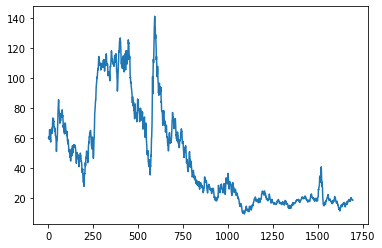

In [3]:
plt.plot(stamp,ts)

In [4]:
#import pyemd.EEMD
from PyEMD import EEMD 
eemd = EEMD()

In [5]:
emd = eemd.EMD
emd.extrema_detection="parabol"

In [6]:
eIMFs = eemd.eemd(ts,stamp)
nIMFs = eIMFs.shape[0]
#nIMFs = int(math.log(len(stamp),2))
#nIMFs = 15

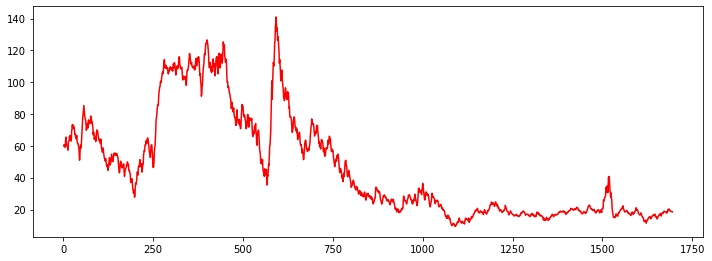

In [7]:
plt.figure(figsize=(12,50))
plt.subplot(nIMFs+1,1,1)
plt.plot(stamp,ts,'r')

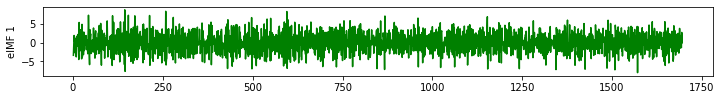

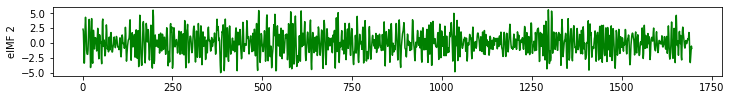

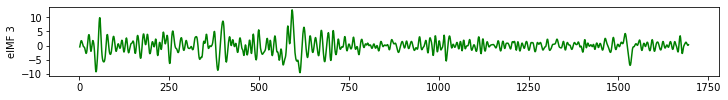

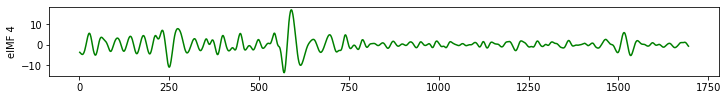

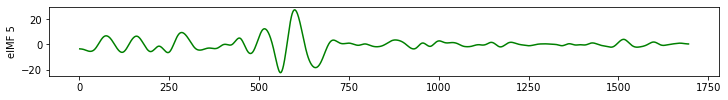

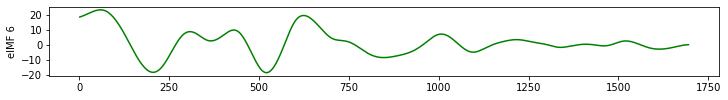

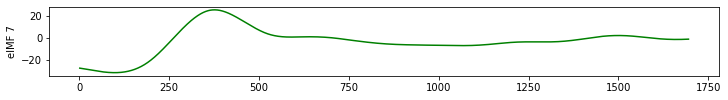

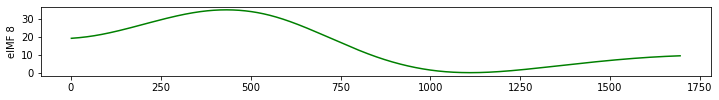

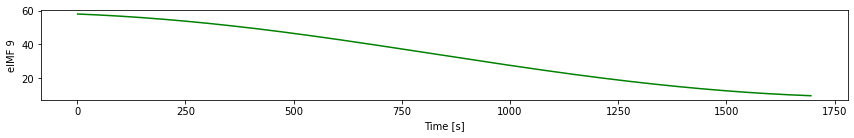

In [8]:
for n in range(nIMFs):
    plt.figure(figsize=(12,15))
    plt.subplot(nIMFs+1,1,n+2)
    plt.plot(stamp,eIMFs[n],'g')
    plt.ylabel("eIMF %i"%(n+1))
    plt.locator_params(axis='y',nbins=5)
    
plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
#plt.show()

In [10]:
print(eIMFs[0]) # Printing one of the IMFs
l = len(stamp)
print(l)

[-3.44178242 -0.78443503  1.8913432  ... -1.38085533  2.71195074
 -0.07082982]
1695


In [12]:
sum = [0 for i in range(0,l)]
for i in range(0,l):
    for j in range(0,nIMFs):
        sum[i] += eIMFs[j][i]
        
#print(sum)

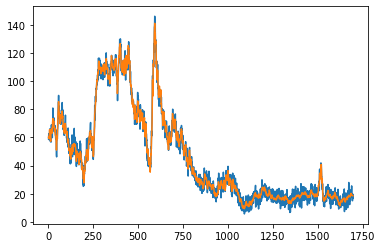

In [13]:
plt.plot(stamp,sum)
plt.plot(stamp,ts)

## The sum of the IMFs and the actual data set overlap well. EEMD decomposition seems to be a good choice

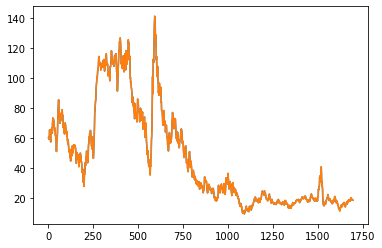

In [14]:
residual = [0 for i in range(0,l)]
for i in range(0,l):
    residual[i] = ts[i] - sum[i]
    
t1 = [0 for i in range(0,l)]
for i in range(0,l):
    t1[i] = sum[i] + residual[i] 
    
plt.plot(stamp,t1)
plt.plot(stamp,ts)

### Perfect Overlap

In [15]:
write_list = []
print(l)
for i in range(0,l):
    temp = []
    for j in range(0,nIMFs):
        temp.append(eIMFs[j][i])
    write_list.append(temp)

#print(write_list)

with open("Intrinsic Mode Functions.csv","w",newline="") as f:
    writer = csv.writer(f)
    writer.writerows(write_list)
f.close()

1695


In [16]:
## Write the error terms in a  csv file

print(l)

with open("Residuals.csv","w",newline="") as f:
    writer = csv.writer(f)
    for i in range(0,l):
        writer.writerow([residual[i]])
f.close()

1695


## Main Pattern Characteristic Determination

In [17]:
n1 = len(eIMFs) # Number of decomposed modes
print(eIMFs[0])
n2 = len(eIMFs[0]) # Number of data points
print(n1,n2)

[-3.44178242 -0.78443503  1.8913432  ... -1.38085533  2.71195074
 -0.07082982]
9 1695


In [18]:
## Cumulative Sum of Squares

CSS = [[] for i in range(0,n1)] # n1 number of observations
for i in range(0,n1):
    for j in range(0,n2):
        SS = 0
        for k in range(0,j+1):
            SS += math.pow(eIMFs[i][k],2)
        CSS[i].append(SS)

In [23]:
print(len(CSS))

9


In [24]:
## Cumulative Sum of Squares:
## CSS[i] = [C1,C2,C3,..........,C1695]

## Normalize and center the cummulative sum of squares
## Dk = (Ck/Ct) - (k/t)

D = [[] for i in range(0,n1)] # Normalized CSS
for i in range(0,n1):
    for j in range(0,n2):
        d = (CSS[i][j]/CSS[i][n2-1]) - ((i+1)/n2)
        D[i].append(d)

In [25]:
print(len(D[0]))
print(D[1])

1695
[-0.00025956049515790463, 0.0004217067345474825, 0.00043690618331201415, 0.002499080003878122, 0.004437338998659061, 0.0044469477184545005, 0.005956215043744005, 0.009198266425262952, 0.010859310146067365, 0.010962315330992541, 0.01121657057037813, 0.011799945037314873, 0.012454761230920708, 0.01310886763537802, 0.013369780896299468, 0.013486452932539209, 0.01498443314271894, 0.017706109530756926, 0.02000833374066181, 0.020491744071105513, 0.020958888930519354, 0.023992430615725407, 0.025781988453428224, 0.026119767538481792, 0.02903090762970651, 0.029239298786771385, 0.030722808386795718, 0.032784351711155686, 0.032798115206554714, 0.03357724693138664, 0.033808808918058895, 0.03393627374540808, 0.0341232488221099, 0.034123371998493836, 0.034255738618112576, 0.034386026544034505, 0.034478621165884904, 0.03447867880664237, 0.03481009714696656, 0.03504696166648958, 0.035238676971786446, 0.03628288752946509, 0.03644615416941435, 0.03690127837755066, 0.03816707289188287, 0.03834747869

In [29]:
## Maximum Centered Cumulative Sum of Squares
## Find maximum value of D, the index is the potential breakpoint

## We need to take absolute value of D:
for i in range(0,n1):
    for j in range(0,n2):
        if D[i][j] < 0:
            D[i][j] = D[i][j]*(-1)

## break points
bp = [0 for i in range(0,n1)]
for i in range(0,n1):
    bp[i] = D[i].index(max(D[i]))
print(bp)

[1694, 1694, 1694, 1694, 1694, 1694, 1694, 1694, 1694]


In [30]:
## The main pattern characteristic model is performed after modeling the data and finding the errors
## Since observable component of only level is there
## We perform the exponential Smoothing of the IMF's

### We perform a simple mean average level for the first 3 IMFs and an exponential smoothing for the rest

## Exponential Smoothing of Intrinsic Mode functions

## Exponential Smoothing : F(t+1) = alpha*Dt + (1-alpha)*Ft

In [31]:
## We take the initial Fo = average of all the values
Fo = []

## For each IMF: ## find the average and initialize Lo
for i in range(0,nIMFs):
    s = 0
    for j in range(0,l):
        s = s + eIMFs[i][j]
    s = s/l
    Fo.append(s)
    
print(Fo)

[0.015437517726369898, -0.02965902298558094, -0.02404080611483639, 0.09616639299860177, -0.004817125433938962, 0.9766094285210812, -0.47508402854483706, 3.6366070521575113, 42.238561695266746]


The number of Intrinsic Mode Functions:  9
The number of data points in the time series : 1695


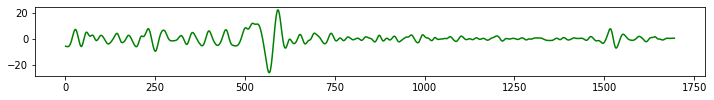

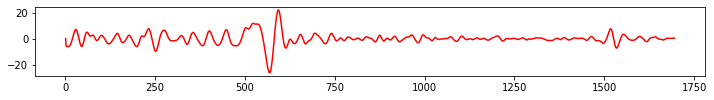

In [32]:
print("The number of Intrinsic Mode Functions: ",nIMFs)
print("The number of data points in the time series :",l)

## Mean level for first 3 IMFs and Exponential Smoothing for the rest 

forecast = [[] for i in range(0,nIMFs)]
for i in range(0,nIMFs):
    forecast[i].append(Fo[i])
    
## Smoothing Parameter: Parameter Tuning According to datasets
alpha = 0.9
    
## Exponential Smoothing:
for i in range(3,nIMFs):
    for j in range(0,l-1):
        F = alpha*eIMFs[i][j] + (1-alpha)*forecast[i][j]
        forecast[i].append(F)
        
#print(forecast[0])

# Sample plot for checking the Smoothing Effect
# print(ts)

plt.figure(figsize=(12,15))
plt.subplot(nIMFs+1,1,n+2)
plt.plot(stamp,eIMFs[3],'g')
plt.figure(figsize=(12,15))
plt.subplot(nIMFs+1,1,n+2)
plt.plot(stamp,forecast[3],'r')
plt.show()

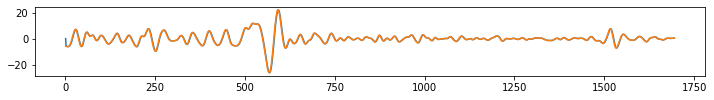

In [33]:
plt.figure(figsize=(12,15))
plt.subplot(nIMFs+1,1,n+2)
plt.plot(stamp,forecast[3])
plt.plot(stamp,eIMFs[3])

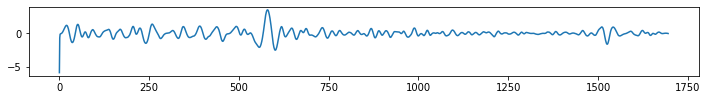

In [34]:
## Error: Actual - Simulated Value
error = [[] for i in range(0,nIMFs)]
for i in range(3,nIMFs):
    for j in range(0,l):
        error[i].append(eIMFs[i][j] - forecast[i][j])

plt.figure(figsize=(12,15))
plt.subplot(nIMFs+1,1,n+2)
plt.plot(stamp,error[3])
plt.show()
#print(error[3])

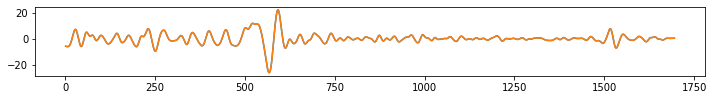

In [35]:
## Rechecking:

check = []
for i in range(0,l):
    check.append(forecast[3][i] + error[3][i])
    
plt.figure(figsize=(12,15))
plt.subplot(nIMFs+1,1,n+2)
plt.plot(stamp,eIMFs[3])
plt.plot(stamp,check)
plt.show()  

## Average Level for the first 3 values

In [36]:
for i in range(0,3):
    print("The forecast for IMF ",i+1," is", forecast[i][0])

The forecast for IMF  1  is 0.015437517726369898
The forecast for IMF  2  is -0.02965902298558094
The forecast for IMF  3  is -0.02404080611483639


## Calculating the errors for all the time series forecast:

### Errors for average level estimate and the exponential smoothing models

In [37]:
error = [[] for i in range(0,nIMFs)]
for i in range(0,nIMFs):
    for j in range(0,l):
        if i >= 3:
            error[i].append(eIMFs[i][j] - forecast[i][j])
        else:
            error[i].append(eIMFs[i][j] - forecast[i][0])

## Plot of error functions:

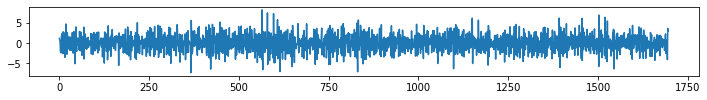

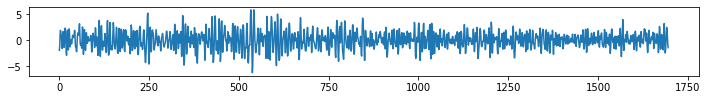

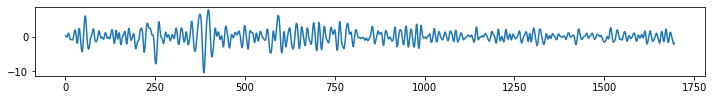

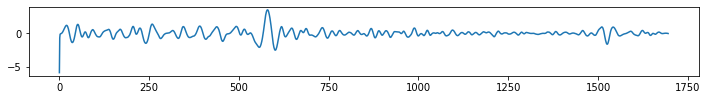

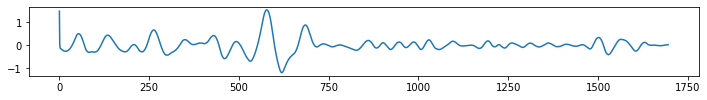

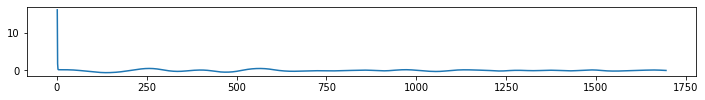

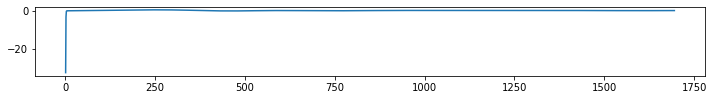

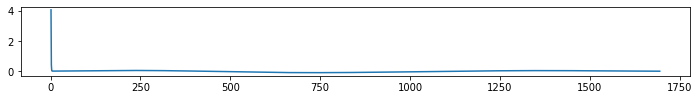

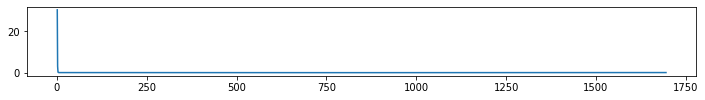

In [38]:
for i in range(0,nIMFs):
    plt.figure(figsize=(12,15))
    plt.subplot(nIMFs+1,1,n+2)
    plt.plot(stamp,error[i])
    plt.show()  

## Now we perform the Iterative Cumulative Sum of Squares Test (ICSS Algorithm)

### Using the model error terms find the cumulative sum of squares (CSS) for all potential breakpoints 
### observations 1 through k :

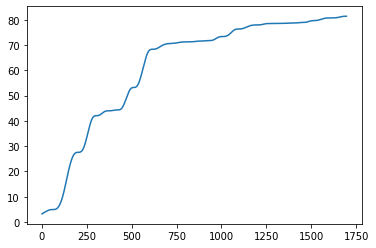

In [39]:
## Cumulative Sum of Squares

CSS = [[] for i in range(0,nIMFs)] 
for i in range(0,nIMFs):
    for j in range(1,l):
        SS = 0
        for k in range(1,j+1):
            SS += math.pow(error[i][k],2)
        CSS[i].append(SS)
        
plt.plot(stamp[1:],CSS[5])
plt.show()

In [40]:
## Cumulative Sum of Squares:
## CSS[i] = [C1,C2,C3,..........,C1695]

## Normalize and center the cummulative sum of squares
## Dk = (Ck/Ct) - (k/t)

D = [[] for i in range(0,nIMFs)] # Normalized CSS
for i in range(0,nIMFs):
    for j in range(0,l-1):
        d = (CSS[i][j]/CSS[i][l-2]) - ((j+1)/l-1)
        D[i].append(d)

1694


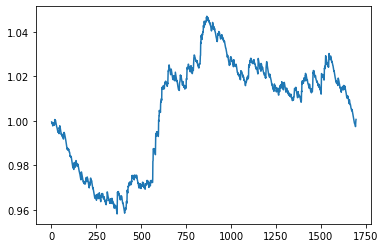

In [41]:
print(len(D[0]))
plt.plot(stamp[1:],D[0])
plt.show()
#print(D[0])

## CSS Normalized and centered cumulative Sum of squares plot for the error terms of IMFs 

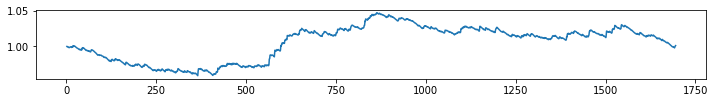

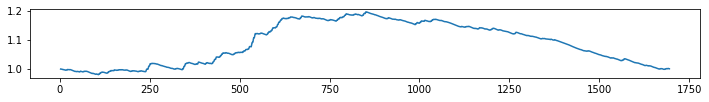

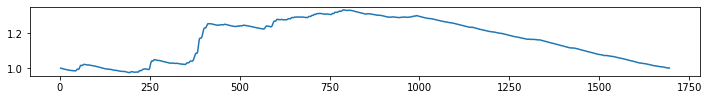

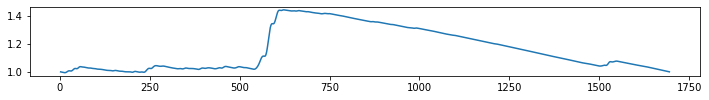

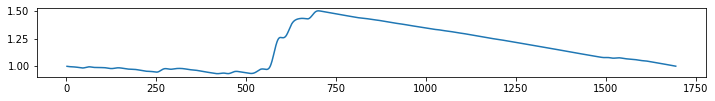

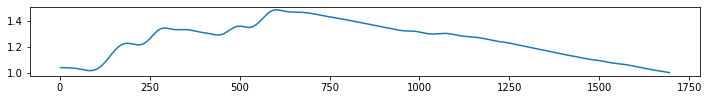

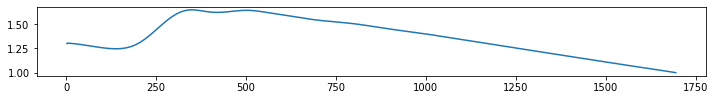

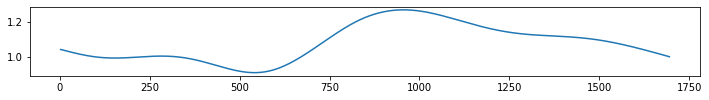

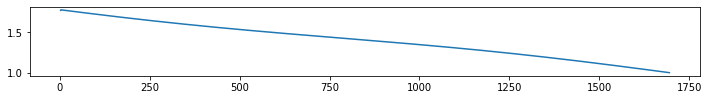

In [42]:
for i in range(0,nIMFs):
    plt.figure(figsize=(12,15))
    plt.subplot(nIMFs+1,1,n+2)
    plt.plot(stamp[1:],D[i])
    plt.show()  

## Taking the absolute Values of Dk:

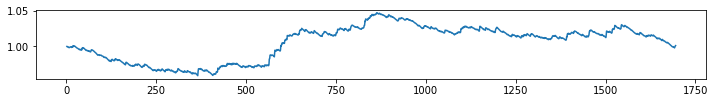

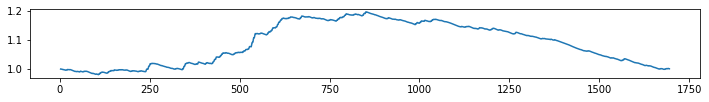

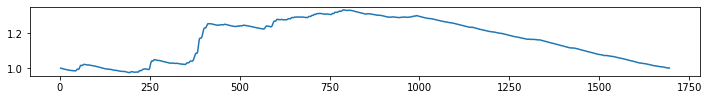

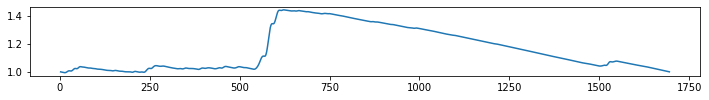

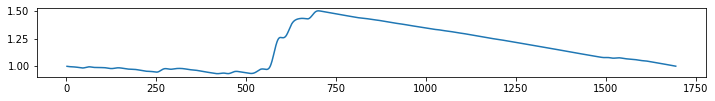

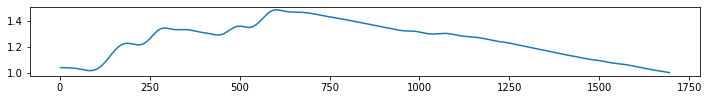

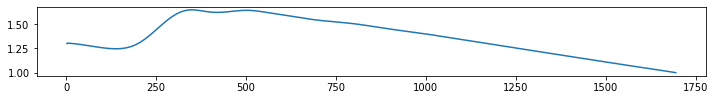

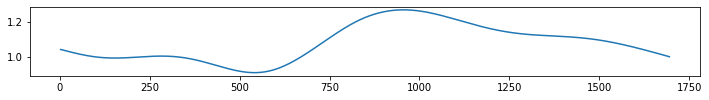

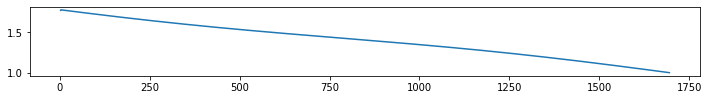

In [43]:
## Maximum Centered Cumulative Sum of Squares
## Find maximum value of D, the index is the potential breakpoint

## We need to take absolute value of D:
for i in range(0,nIMFs):
    for j in range(0,l-1):
        if D[i][j] < 0:
            D[i][j] = D[i][j]*(-1)
            
for i in range(0,nIMFs):
    plt.figure(figsize=(12,15))
    plt.subplot(nIMFs+1,1,n+2)
    plt.plot(stamp[1:],D[i])
    plt.show() 

In [44]:
## break points
bp = [0 for i in range(0,nIMFs)]
for i in range(0,nIMFs):
    bp[i] = D[i].index(max(D[i]))
print(bp)

[863, 849, 787, 620, 699, 600, 347, 954, 1]


## Pattern characteristic Testing

### Seasonality or Cyclicity  : Fast Fourier Transform

In [45]:
## Number of time points is l

sampling_Freq = l
sampling_interval = 1/l

beg = 0
end = l

# Time points:

time = np.arange(beg,end,sampling_interval)
print(time)

[0.00000000e+00 5.89970501e-04 1.17994100e-03 ... 1.69499823e+03
 1.69499882e+03 1.69499941e+03]


ValueError: x and y must have same first dimension, but have shapes (2873025,) and (1695,)

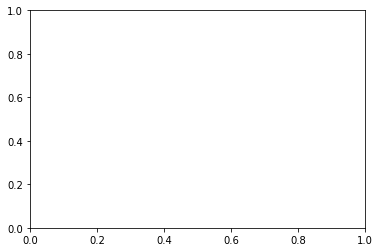

In [46]:
np_ts = np.asarray(ts)
plt.plot(time,np_ts)
plt.show()

In [47]:
np_EIMFs = []
for i in range(0,n):
    np_EIMFs.append(np.asarray(eIMFs[i]))
print(eIMFs[0])

[ 1.16278063  0.7854079   0.33618816 ... -4.12440055  3.65699073
  2.99032296]


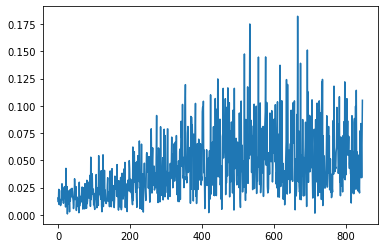

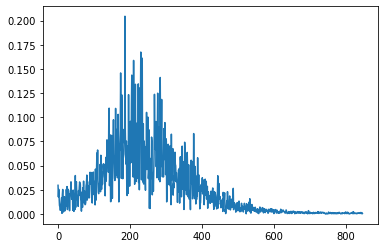

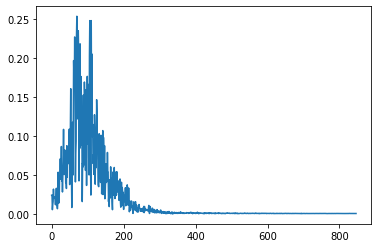

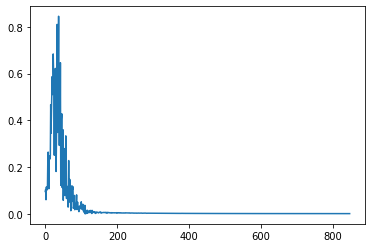

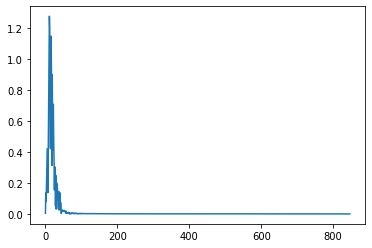

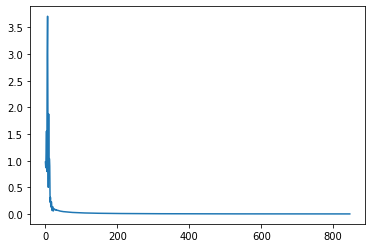

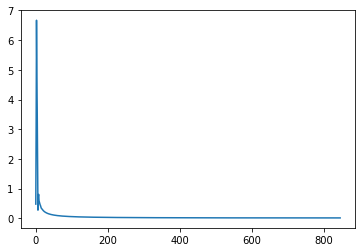

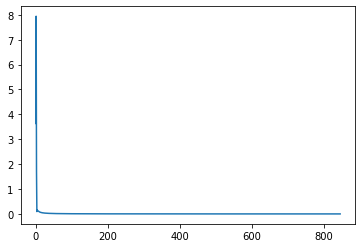

In [48]:
## Frequency Domain Representation:

fourier = []
for i in range(0,n):
    fourier.append(np.fft.fft(eIMFs[i])/len(eIMFs[i]))
    fourier[i] = fourier[i][range(int(len(eIMFs[i])/2))] # Sampling Frequency excluded
    
tpcount = l
values = np.arange(int(tpcount/2))
timeperiod = tpcount/sampling_Freq 
frequencies = values/timeperiod
    
for i in range(0,n):
    plt.plot(frequencies,abs(fourier[i]))
    plt.show()

In [ ]:
## Find maximal Spectral Power:
https://pythontic.com/visualization/signals/fouriertransform_fft
https://docs.scipy.org/doc/numpy/reference/routines.fft.html